In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
import plotly.express as px

plt.style.use('ggplot')

In [2]:
#Read the master data
df = pd.read_csv("master_data.csv")

### Step 1: Data Understanding

* Dataframe shape
* head and tail
* dtypes
* describe

In [3]:
df.shape

(87, 10)

In [4]:
df.head()

,Name,Email,Age,Country,Education Level,Number of Languages Spoken,Gender,Satisfaction Rate,Marital Status,Number of Children
0,Landon Patel,landonpatel@gmail.com,32,United States,Bachelor's Degree,2,Male,8,Single,3
1,Cassidy Turner,cassidyturner@yahoo.com,24,Canada,Master's Degree,1,Non-binary,9,Married,4
2,Axl Thompson,axl.thompson@hotmail.com,43,United States,High School,3,Male,7,Single,1
3,Ivy Wilson,ivywilson@gmail.com,58,United Kingdom,Bachelor's Degree,4,Female,6,Divorced,0
4,Reece Scott,reece.scott@outlook.com,26,Australia,Doctorate,4,Male,4,Married,2


In [5]:
df.dtypes

Name                          object
Email                         object
Age                            int64
Country                       object
Education Level               object
Number of Languages Spoken     int64
Gender                        object
Satisfaction Rate              int64
Marital Status                object
Number of Children             int64
dtype: object

In [6]:
df.describe()

,Age,Number of Languages Spoken,Satisfaction Rate,Number of Children
count,87.000000,87.000000,87.000000,87.000000
mean,40.195402,2.310345,5.781609,1.862069
std,13.479389,1.164498,2.656389,1.431964
min,20.000000,1.000000,1.000000,0.000000
25%,28.500000,1.000000,4.000000,1.000000
50%,40.000000,2.000000,6.000000,2.000000
75%,51.500000,3.000000,8.000000,3.000000
max,61.000000,4.000000,10.000000,4.000000


### Step 2: Feature Understanding
(Univariate analysis)

Plotting Feature Distributions
* Histogram
* KDE
* Boxplot

Text(0, 0.5, 'Count')

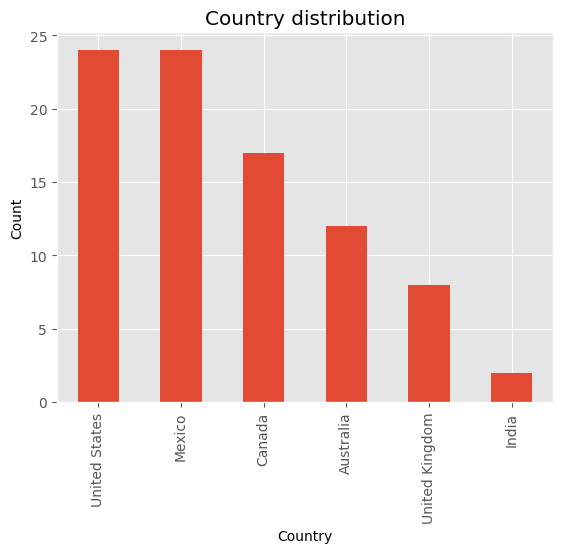

In [7]:
ax = df['Country'].value_counts().plot(kind='bar', title='Country distribution')
ax.set_xlabel('Country')
ax.set_ylabel('Count')

Text(0, 0.5, 'Count')

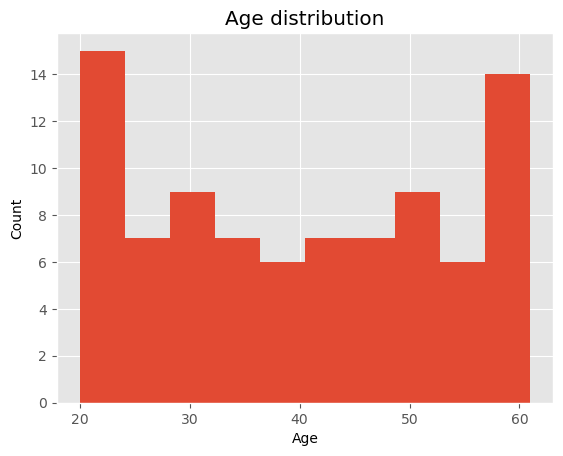

In [8]:
# Visualize the distribution of numerical variables
ax = df['Age'].plot(kind='hist', title='Age distribution')
ax.set_xlabel('Age')
ax.set_ylabel('Count')

The colors of the bars are: [(0.8862745098039215, 0.2901960784313726, 0.2, 1.0), (0.8862745098039215, 0.2901960784313726, 0.2, 1.0), (0.8862745098039215, 0.2901960784313726, 0.2, 1.0), (0.8862745098039215, 0.2901960784313726, 0.2, 1.0)]


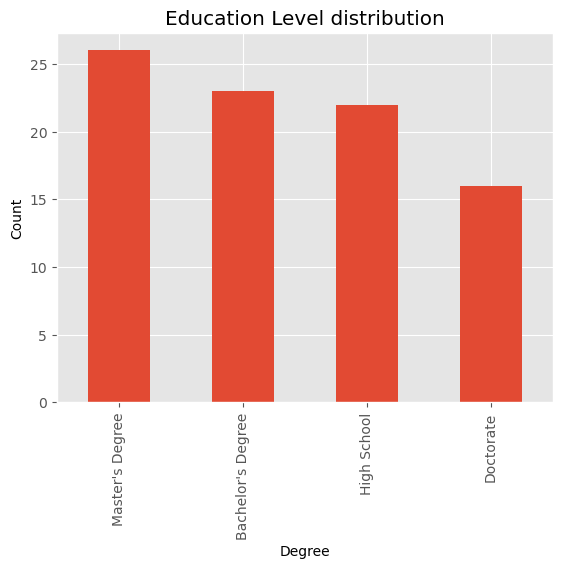

In [9]:
# Create a bar plot of Education Level distribution
ax = df['Education Level'].value_counts().plot(kind='bar', title='Education Level distribution')

# Set the axis labels
ax.set_xlabel('Degree')
ax.set_ylabel('Count')

# Get the colors of the bars
colors = [bar.get_facecolor() for bar in ax.patches]

# Print the colors
print(f"The colors of the bars are: {colors}")

plt.show()

### Step 3: Feature Relationships

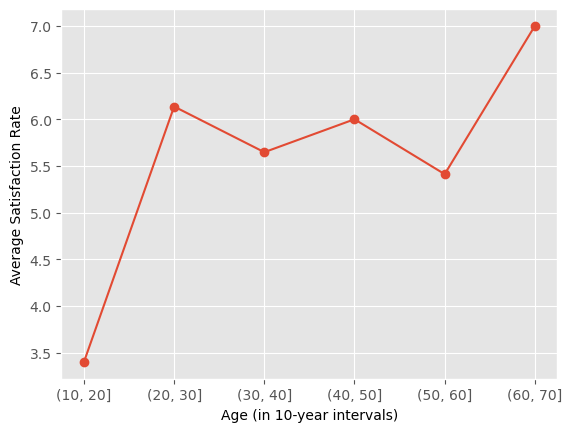

In [10]:


# Group the DataFrame by age in intervals of 5 years, and calculate the mean of Satisfaction Rate for each group
df_age = df.groupby(pd.cut(df['Age'], range(0, 101, 10)))['Satisfaction Rate'].mean()

# Plot the results
fig, ax = plt.subplots()
ax.plot(df_age.index.astype(str), df_age.values, '-o')
ax.set_xlabel('Age (in 10-year intervals)')
ax.set_ylabel('Average Satisfaction Rate')

plt.show()

In [11]:
# Create a correlation matrix for numerical variables
correlation_matrix = df[['Age', 'Number of Languages Spoken', 'Satisfaction Rate', 'Number of Children']].corr()
correlation_matrix

,Age,Number of Languages Spoken,Satisfaction Rate,Number of Children
Age,1.000000,0.121285,0.069402,-0.084733
Number of Languages Spoken,0.121285,1.000000,-0.090605,-0.078629
Satisfaction Rate,0.069402,-0.090605,1.000000,-0.023295
Number of Children,-0.084733,-0.078629,-0.023295,1.000000


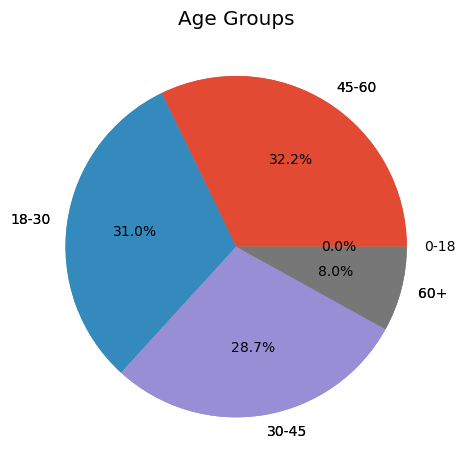

In [12]:
# Derive a new feature 'Age Group' from 'Age'
df['Age Group'] = pd.cut(df['Age'], bins=[0, 18, 30, 45, 60, float('inf')], labels=['0-18', '18-30', '30-45', '45-60', '60+'])

# Create various visualizations to summarize findings
ax = df['Age Group'].value_counts().plot(kind='pie', title='Age Groups', )
ax.set_ylabel('')

# Plotting the pie chart
plt.pie(df['Age Group'].value_counts(), 
        labels=df['Age Group'].value_counts().index, autopct='%1.1f%%')

# Adding numbers on the pie chart
plt.gca().set_aspect('equal')  # Equal aspect ratio ensures a circular pie chart
plt.tight_layout()  # Adjusts the padding and spacing
plt.show()

C:\Users\Salih\AppData\Local\Temp\ipykernel_36960\1722579868.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()
C:\Users\Salih\AppData\Local\Temp\ipykernel_36960\1722579868.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_matrix, dtype=np.bool)


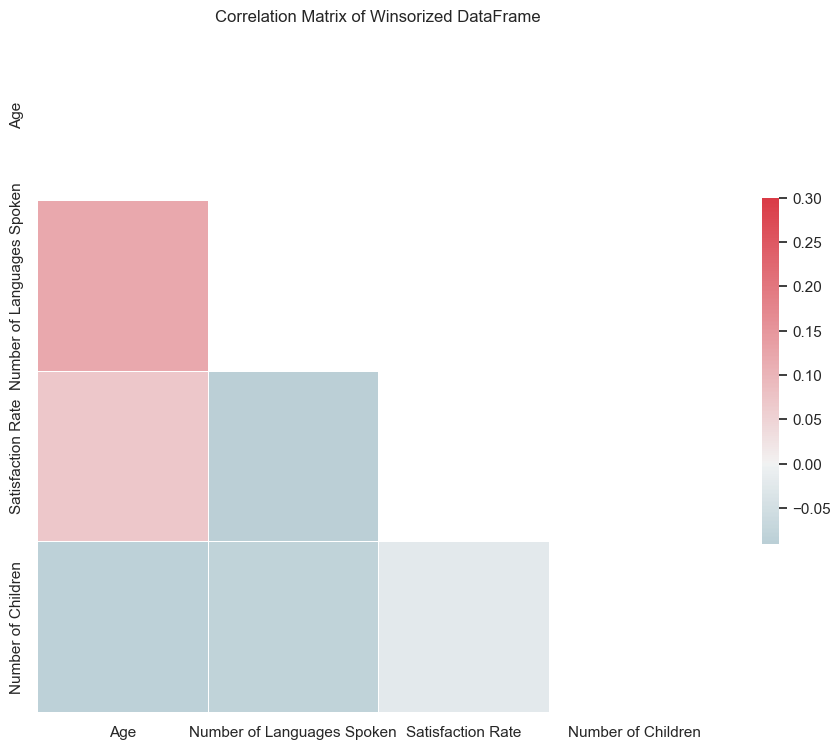

In [13]:
# Create the correlation matrix
corr_matrix = df.corr()

# Plot the correlation matrix
sns.set(style="white")
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix of Winsorized DataFrame')
plt.show()

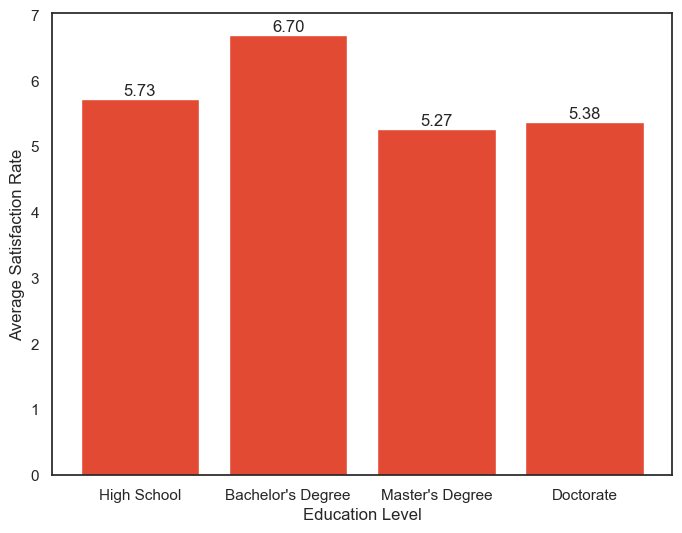

In [14]:
# Calculate the average Satisfaction Rate by Education Level
avg_satisfaction_by_education = df.groupby('Education Level')['Satisfaction Rate'].mean()

# Sort the Series by Education Level
avg_satisfaction_by_education = avg_satisfaction_by_education.reindex(['High School', "Bachelor's Degree", "Master's Degree", 'Doctorate'])

custom_color = (0.8862745098039215, 0.2901960784313726, 0.2)

# Create a larger bar plot of average Satisfaction Rate by Education Level with custom colors
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(avg_satisfaction_by_education.index, avg_satisfaction_by_education.values, color=custom_color)
ax.set_xlabel('Education Level')
ax.set_ylabel('Average Satisfaction Rate')

# Add numerical values on top of the bars
for i, v in enumerate(avg_satisfaction_by_education.values):
    ax.text(i, v, f"{v:.2f}", ha='center', va='bottom')


plt.show()

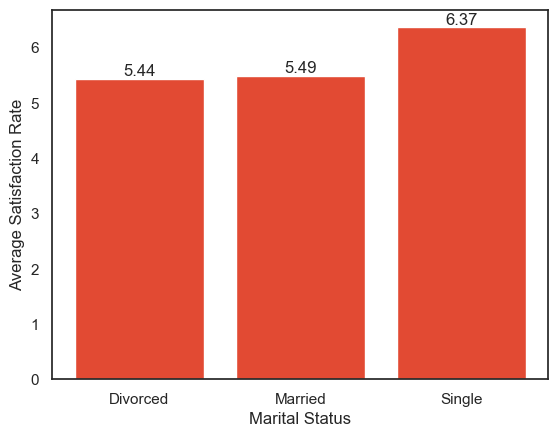

In [15]:
# Calculate the average Satisfaction Rate by Marital Status
avg_satisfaction_by_marital = df.groupby('Marital Status')['Satisfaction Rate'].mean()

# Create a bar plot of average Satisfaction Rate by Marital Status
fig, ax = plt.subplots()
ax.bar(avg_satisfaction_by_marital.index, avg_satisfaction_by_marital.values, color=custom_color)
ax.set_xlabel('Marital Status')
ax.set_ylabel('Average Satisfaction Rate')

# Add numerical values on top of the bars
for i, v in enumerate(avg_satisfaction_by_marital.values):
    ax.text(i, v, f"{v:.2f}", ha='center', va='bottom')

plt.show()

**there is no enough data in gender type Non-binary to conclude an average satisfaction rate**

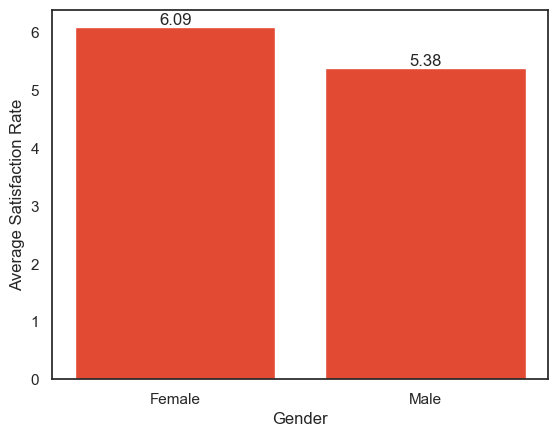

In [16]:
# Filter out Non-binary gender
df = df[df['Gender'] != 'Non-binary']

# Calculate the average Satisfaction Rate by Gender
avg_satisfaction_by_gender = df.groupby('Gender')['Satisfaction Rate'].mean()

# Create a bar plot of average Satisfaction Rate by Gender
fig, ax = plt.subplots()
ax.bar(avg_satisfaction_by_gender.index, avg_satisfaction_by_gender.values, color=custom_color)
ax.set_xlabel('Gender')
ax.set_ylabel('Average Satisfaction Rate')

# Add numerical values on top of the bars
for i, v in enumerate(avg_satisfaction_by_gender.values):
    ax.text(i, v, f"{v:.2f}", ha='center', va='bottom')

plt.show()

<Axes: xlabel='Number of Languages Spoken', ylabel='Satisfaction Rate'>

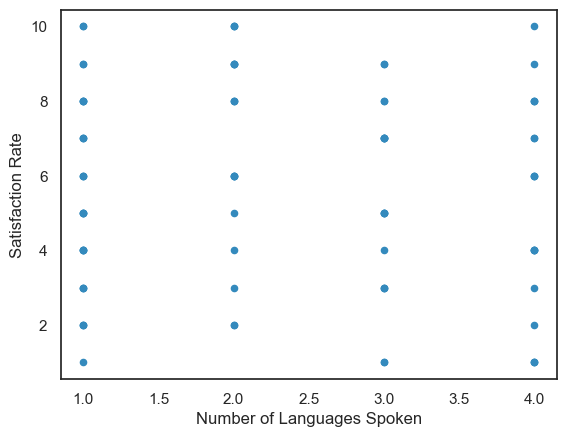

In [17]:
df.plot.scatter(x='Number of Languages Spoken', y='Satisfaction Rate')